## Worldometer Corona DataSet

### Since there is a requirement to parse the data from website in the form of table, for that I will be using BeautifulSoup, which is a python pakage for parsing HTML documents.

>> This is not a static data, it keeps on changing time to time frequently since it is dynamic data. So our dataset is a dynamic dataset

* The data has been received from the official site of worldometer https://www.worldometers.info/coronavirus/. The original data was in the html page format, to extract the data from it I used BeautifulSoup as a scrapper to parse the data.

## Data Dictionary
* Country - Name of the Country
* TotalCases - The total number of cases of the particular country/continent
* NewCases - The total number of new cases.
* TotalDeaths - The total number of deaths of the people.
* NewDeaths - The total number of additional new deaths of the people.
* TotalRecovered- The total number of recovered case of the corona infected people.
* ActiveCases- The total number of active cases that are to be recovered.
* Serious Critical- The total number of critical cases or extreme cases of the people.
* Tot Cases/1M pop- The total number of cases of infected people per million.
* Deaths/1M pop- The total number of deaths of the infected people per million.
* TotalTests- The total number of tests done.
* Test/1M pop- The total number of test done per million.
* Population- The total number of population of the country.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import requests
from bs4 import BeautifulSoup

linksite ='https://www.worldometers.info/coronavirus/#countries'
link_url=requests.get(linksite).text
soup = BeautifulSoup(link_url,'html.parser')
table = soup.find('tbody')
table_values = []
for row in table.findAll('tr'):
    row_value = []
    for cell in row.findAll('td'):
        row_value.append(cell.text)
    if(len(row_value) > 0):
        data_item = {"Country": row_value[1],
                     "TotalCases": row_value[2],
                     "NewCases": row_value[3],
                     "TotalDeaths": row_value[4],
                     "NewDeaths": row_value[5],
                     "TotalRecovered": row_value[6],
                     "ActiveCases": row_value[8],
                     "Serious Critical":row_value[9],
                     "Tot Cases/1M pop":row_value[10],
                     "Deaths/1M pop":row_value[11],
                     "Total Tests":row_value[12],
                     "Tests/1M pop":row_value[13],
                     "Population":row_value[14]
                     
                     
        }
        table_values.append(data_item)
df = pd.DataFrame(table_values)
df.to_excel("scrappedcoronadataset.xlsx",index=False)

In [3]:
df.head(20)

Country  TotalCases NewCases TotalDeaths NewDeaths  \
0   \nNorth America\n  27,752,890  +21,646     584,846    +1,231   
1            \nAsia\n  21,996,795  +19,177     355,970      +315   
2   \nSouth America\n  14,583,895   +2,091     387,297       +25   
3          \nEurope\n  27,372,404  +33,372     624,499      +705   
4          \nAfrica\n   3,251,235               78,413             
5         \nOceania\n      49,560      +30       1,071             
6                \n\n         721                   15             
7               World  95,007,500  +76,316   2,032,111    +2,276   
8                 USA  24,306,043             405,261              
9               India  10,558,710             152,311              
10             Brazil   8,456,705             209,350              
11             Russia   3,568,209  +23,586     65,566       +481   
12                 UK   3,357,361              88,590              
13             France   2,894,347              70,142              
14             Turkey   2,380,665              23,832              
15              Italy   2,368,733              81,800              
16              Spain   2,252,164              53,314              
17            Germany   2,038,645              47,121              
18           Colombia   1,891,034              48,256              
19          Argentina   1,791,979              45,295              

   TotalRecovered ActiveCases Serious Critical Tot Cases/1M pop Deaths/1M pop  \
0      17,003,703  10,164,341           36,169                                  
1      20,410,157   1,230,668           24,329                                  
2      12,867,944   1,328,654           19,038                                  
3      14,857,753  11,890,152           29,549                                  
4       2,661,465     511,357            2,644                                  
5          33,761      14,728               18                                  
6             706           0                0                                  
7      67,835,489  25,139,900          111,747           12,189         260.7   
8      14,343,644   9,557,138           28,850           73,198         1,220   
9      10,196,885     209,514            8,944            7,611           110   
10      7,388,784     858,571            8,318           39,632           981   
11      2,960,431     542,212            2,300           24,445           449   
12      1,519,106   1,749,665            3,789           49,315         1,301   
13        208,071   2,616,134            2,740           44,288         1,073   
14      2,254,052     102,781            2,265           28,063           281   
15      1,729,216     557,717            2,520           39,209         1,354   
16            N/A         N/A            2,953           48,160         1,140   
17      1,657,900     333,624            5,074           24,290           561   
18      1,711,924     130,854            3,482           36,950           943   
19      1,573,104     173,580            3,578           39,452           997   

    Total Tests Tests/1M pop      Population  
0                                             
1                                             
2                                             
3                                             
4                                             
5                                             
6                                             
7                                             
8   283,753,126      854,521    332,060,944   
9   186,544,868      134,458  1,387,382,566   
10   28,600,000      134,032    213,382,578   
11   96,600,000      661,786    145,968,697   
12   63,139,169      927,419     68,080,521   
13   39,548,718      605,160     65,352,445   
14   27,223,445      320,909     84,832,278   
15   28,994,914      479,944     60,413,129   
16   28,775,103      615,317     46,764,686   
17   36,353,196      433,136     83,9

### We can clearly see that our dataset is not cleaned and there are many unnceccasry punctuatuions symbols.So, it is our responsibility to remove such symbols otherwise it will produce a noise in the datasets.Similary, all of our datasets are in the form of objects which doesn't help to perform any numerical manipulation, for that I will convert all the datasets into numercal so that it will help in further analysis.Here the first five 6 rows is the data about the continent to let's explore the continent first then I will explore countries later on

# Continent Data Exploration

In [4]:
continent = df.head(6)

In [5]:
continent

Country  TotalCases NewCases TotalDeaths NewDeaths  \
0  \nNorth America\n  27,752,890  +21,646     584,846    +1,231   
1           \nAsia\n  21,996,795  +19,177     355,970      +315   
2  \nSouth America\n  14,583,895   +2,091     387,297       +25   
3         \nEurope\n  27,372,404  +33,372     624,499      +705   
4         \nAfrica\n   3,251,235               78,413             
5        \nOceania\n      49,560      +30       1,071             

  TotalRecovered ActiveCases Serious Critical Tot Cases/1M pop Deaths/1M pop  \
0     17,003,703  10,164,341           36,169                                  
1     20,410,157   1,230,668           24,329                                  
2     12,867,944   1,328,654           19,038                                  
3     14,857,753  11,890,152           29,549                                  
4      2,661,465     511,357            2,644                                  
5         33,761      14,728               18                                  

  Total Tests Tests/1M pop Population  
0                                      
1                                      
2                                      
3                                      
4                                      
5

In [6]:
# let's drop some of the columns as there is no any data available
continent.drop(labels=['Tot Cases/1M pop','Deaths/1M pop','Total Tests','Tests/1M pop','Population'],axis=1,inplace=True)

In [7]:
continent.head()

Country  TotalCases NewCases TotalDeaths NewDeaths  \
0  \nNorth America\n  27,752,890  +21,646     584,846    +1,231   
1           \nAsia\n  21,996,795  +19,177     355,970      +315   
2  \nSouth America\n  14,583,895   +2,091     387,297       +25   
3         \nEurope\n  27,372,404  +33,372     624,499      +705   
4         \nAfrica\n   3,251,235               78,413             

  TotalRecovered ActiveCases Serious Critical  
0     17,003,703  10,164,341           36,169  
1     20,410,157   1,230,668           24,329  
2     12,867,944   1,328,654           19,038  
3     14,857,753  11,890,152           29,549  
4      2,661,465     511,357            2,644

In [8]:
## Replacing the new line("\n") with ''

In [9]:
continent['Country'] = continent['Country'].apply(lambda x:x.replace("\n",""))


In [10]:
#Similary, removing comma and + symbol
continent['TotalCases'] = continent['TotalCases'].apply(lambda x:x.replace(',',''))
continent['NewCases'] = continent['NewCases'].apply(lambda x:x.replace('+','').replace(',',''))
continent['TotalDeaths'] = continent['TotalDeaths'].apply(lambda x:x.replace(',',''))
continent['NewDeaths'] = continent['NewDeaths'].apply(lambda x:x.replace('+','').replace(',',''))
continent['TotalRecovered'] = continent['TotalRecovered'].apply(lambda x:x.replace(',',''))
continent['ActiveCases'] = continent['ActiveCases'].apply(lambda x:x.replace(',',''))
continent['Serious Critical'] = continent['Serious Critical'].apply(lambda x:x.replace(',',''))



In [11]:
continent.head()

Country TotalCases NewCases TotalDeaths NewDeaths TotalRecovered  \
0  North America   27752890    21646      584846      1231       17003703   
1           Asia   21996795    19177      355970       315       20410157   
2  South America   14583895     2091      387297        25       12867944   
3         Europe   27372404    33372      624499       705       14857753   
4         Africa    3251235                78413                  2661465   

  ActiveCases Serious Critical  
0    10164341            36169  
1     1230668            24329  
2     1328654            19038  
3    11890152            29549  
4      511357             2644

In [12]:
# replacing all the empty space with NaN value
continent = continent.replace(r'^\s*$', np.NaN, regex=True)

In [13]:
continent.head()

Country TotalCases NewCases TotalDeaths NewDeaths TotalRecovered  \
0  North America   27752890    21646      584846      1231       17003703   
1           Asia   21996795    19177      355970       315       20410157   
2  South America   14583895     2091      387297        25       12867944   
3         Europe   27372404    33372      624499       705       14857753   
4         Africa    3251235      NaN       78413       NaN        2661465   

  ActiveCases Serious Critical  
0    10164341            36169  
1     1230668            24329  
2     1328654            19038  
3    11890152            29549  
4      511357             2644

In [14]:
continent['TotalCases'] = continent['TotalCases'].astype(str).astype('float')
continent['NewCases'] = continent['NewCases'].astype(str).astype('float')
continent['TotalDeaths'] = continent['TotalDeaths'].astype(str).astype('float')
continent['NewDeaths'] = continent['NewDeaths'].astype(str).astype('float')
continent['TotalRecovered'] = continent['TotalRecovered'].astype(str).astype('float')
continent['ActiveCases'] = continent['ActiveCases'].astype(str).astype('float')
continent['Serious Critical'] = continent['Serious Critical'].astype(str).astype('float')

### Let's confirm that our datasets are all numeric

In [15]:
for label,content in continent.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

TotalCases
NewCases
TotalDeaths
NewDeaths
TotalRecovered
ActiveCases
Serious Critical


>> Yes our continent dataset is all in numeric format except continent name itself which is not essential to convert into numerical data.

* Since now our dataset is converted to numerical format we can use describe() function to see how these data are districbuted, if our dataset was object as before then we cannot use describe() property. This is the biggest merit of converting the dataset in numerical format. Apart from these, while processing our dataset using Machine Learning algorithms also, numerical data helps us to work easily with all the algorithms. 

In [16]:
continent.describe()

TotalCases      NewCases    TotalDeaths    NewDeaths  TotalRecovered  \
count  6.000000e+00      5.000000       6.000000     4.000000    6.000000e+00   
mean   1.583446e+07  15263.200000  338682.666667   569.000000    1.130580e+07   
std    1.201842e+07  14049.411365  255605.753156   521.916979    8.151018e+06   
min    4.956000e+04     30.000000    1071.000000    25.000000    3.376100e+04   
25%    6.084400e+06   2091.000000  147802.250000   242.500000    5.213085e+06   
50%    1.829034e+07  19177.000000  371633.500000   510.000000    1.386285e+07   
75%    2.602850e+07  21646.000000  535458.750000   836.500000    1.646722e+07   
max    2.775289e+07  33372.000000  624499.000000  1231.000000    2.041016e+07   

        ActiveCases  Serious Critical  
count  6.000000e+00          6.000000  
mean   4.189983e+06      18624.500000  
std    5.345940e+06      14570.138678  
min    1.472800e+04         18.000000  
25%    6.911848e+05       6742.500000  
50%    1.279661e+06      21683.500000  
75%    7.955419e+06      28244.000000  
max    1.189015e+07      36169.000000

In [17]:
continent.head()

Country  TotalCases  NewCases  TotalDeaths  NewDeaths  \
0  North America  27752890.0   21646.0     584846.0     1231.0   
1           Asia  21996795.0   19177.0     355970.0      315.0   
2  South America  14583895.0    2091.0     387297.0       25.0   
3         Europe  27372404.0   33372.0     624499.0      705.0   
4         Africa   3251235.0       NaN      78413.0        NaN   

   TotalRecovered  ActiveCases  Serious Critical  
0      17003703.0   10164341.0           36169.0  
1      20410157.0    1230668.0           24329.0  
2      12867944.0    1328654.0           19038.0  
3      14857753.0   11890152.0           29549.0  
4       2661465.0     511357.0            2644.0

### Now, let's visualize which contient has the highest number of Covid Cases.

In [18]:
#Sorting the country by total number of cases with highest number representing at first
continent_with_highest_case = continent.groupby(by="Country")['TotalCases'].sum().sort_values(ascending = False).head(10)

In [19]:
continent_with_highest_case 

Country
North America    27752890.0
Europe           27372404.0
Asia             21996795.0
South America    14583895.0
Africa            3251235.0
Oceania             49560.0
Name: TotalCases, dtype: float64

* Here we can clearly see that, North America has the highest number of total cases till the time now I am writing this notebook.Since, our data is dynamic maybe it will change in later days. The big thing to note from here is that, we can easily guesss since the number of covid cases is extremely large in USA which lies in NorthAmerica and beacause of the North America is the continent with highest number of Covid infetced people.

In [20]:
# Since our dataset is already sorted while scraping the dataset, I can directly use continent dataframe
continent_with_highest_case = continent

In [21]:
continent_with_highest_case

Country  TotalCases  NewCases  TotalDeaths  NewDeaths  \
0  North America  27752890.0   21646.0     584846.0     1231.0   
1           Asia  21996795.0   19177.0     355970.0      315.0   
2  South America  14583895.0    2091.0     387297.0       25.0   
3         Europe  27372404.0   33372.0     624499.0      705.0   
4         Africa   3251235.0       NaN      78413.0        NaN   
5        Oceania     49560.0      30.0       1071.0        NaN   

   TotalRecovered  ActiveCases  Serious Critical  
0      17003703.0   10164341.0           36169.0  
1      20410157.0    1230668.0           24329.0  
2      12867944.0    1328654.0           19038.0  
3      14857753.0   11890152.0           29549.0  
4       2661465.0     511357.0            2644.0  
5         33761.0      14728.0              18.0

## Let's make this case more clear using PieChart

In [22]:

fig = px.pie(continent_with_highest_case,values='TotalCases',names='Country',color='Country',color_discrete_map={"North America":'red',
                                                                                       "Europe":'orange',
                                                                                       "Asia":'gray',
                                                                                        "South America":'purple',
                                                                                        "Africa":'lightblue',
                                                                                        "Oceania":"lightgreen"
                                                                                      },
             title="Continent_Total_Cases_PieChart"
            )
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()



* So, out of 100% cases, NorthAmerica has 29.2% cases followed by Europe with 28.8%

In [23]:
## Now visiualize with matplotlib 

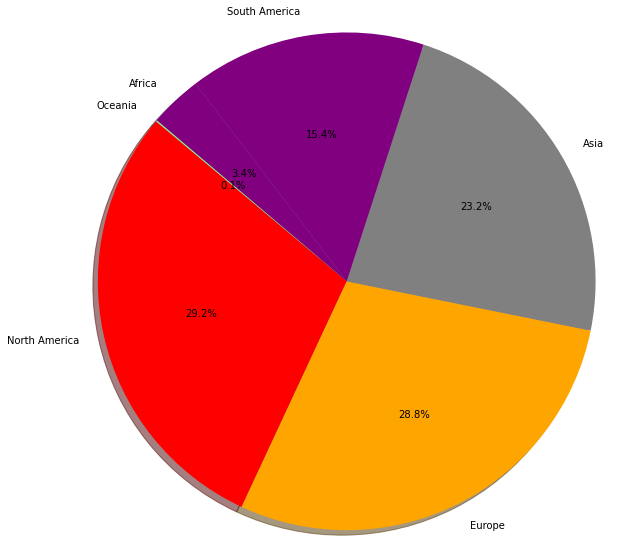

In [163]:
labels = 'North America', 'Europe', 'Asia','South America','Africa','Oceania'
sizes = [29.2, 28.8, 23.2,15.4,3.42,0.08]
colors = ['red', 'orange', 'gray','purple','purple','lightgreen']
explode = (0, 0, 0, 0, 0, 0)  

# Plot
fig = plt.figure(figsize =(10, 10)) 
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.savefig('total_cases_continent.png')


plt.axis('equal')
plt.show()


### Now, let's visualize which contient has the highest number of Serous Critical Cases.

In [164]:
continent_with_critical_case = continent.groupby(by="Country")['Serious Critical'].sum().sort_values(ascending = False).head(10)

In [165]:
continent_with_critical_case

Country
North America    36169.0
Europe           29549.0
Asia             24329.0
South America    19038.0
Africa            2644.0
Oceania             18.0
Name: Serious Critical, dtype: float64

* Once again, the people of North America has severe condition compared to other continents. Oceania has the very less, almost negligible critical cases compared to NorthAmerica and other continents.

In [166]:
crticial_case_continent = continent[(continent['Country']=='North America')|(continent['Country']=='Europe')|
                                    (continent['Country']=='Asia')|(continent['Country']=='South America')|(continent['Country']=='Africa')|
                                    (continent['Country']=='Ocenia')
                                   ]

In [167]:
crticial_case_continent

Country  TotalCases  NewCases  TotalDeaths  NewDeaths  \
0  North America  27752890.0   21646.0     584846.0     1231.0   
1           Asia  21996795.0   19177.0     355970.0      315.0   
2  South America  14583895.0    2091.0     387297.0       25.0   
3         Europe  27372404.0   33372.0     624499.0      705.0   
4         Africa   3251235.0       NaN      78413.0        NaN   

   TotalRecovered  ActiveCases  Serious Critical  
0      17003703.0   10164341.0           36169.0  
1      20410157.0    1230668.0           24329.0  
2      12867944.0    1328654.0           19038.0  
3      14857753.0   11890152.0           29549.0  
4       2661465.0     511357.0            2644.0

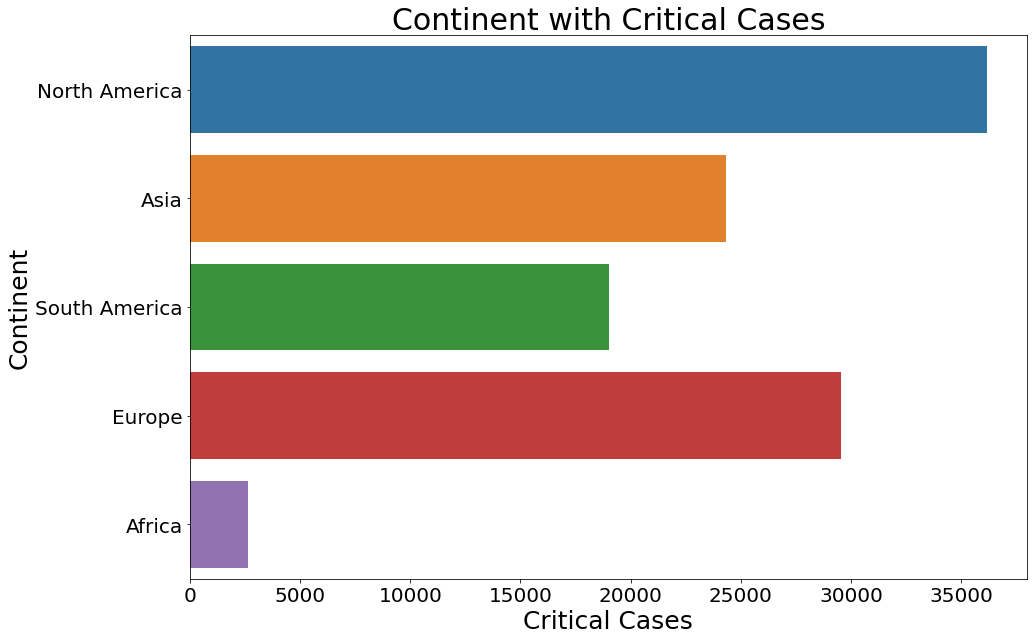

In [168]:
fig, ax = plt.subplots(figsize=(15,10))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title("Continent with Critical Cases",fontsize=30)
plt.xlabel("Serious Critical",fontsize=25)
plt.ylabel("Continent",fontsize=25)
ax = sns.barplot(x = "Serious Critical",y="Country",data=crticial_case_continent)
ax.set(xlabel="Critical Cases",ylabel="Continent")
plt.savefig("continet_Critical.png")
plt.show()

### Now, let's visualize which contient has the Recoverd Cases around Continent.

In [169]:
fig = px.pie(continent,values='TotalRecovered',names='Country',color='Country',color_discrete_map={"North America":'pink',
                                                                                       "Europe":'gray',
                                                                                       "Asia":'lightgreen',
                                                                                        "South America":'orange',
                                                                                        "Africa":'red',
                                                                                        "Oceania":"lightblue"
                                                                                      },
             title="Continent_TotalRecovered_PieChart"
            )
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

* Here one thing to notice is that,Asia has the highest number of recovered case with around 30.1% follwed by NorthAmerica. We can see that Africa has very less recovery rate but it doesn't mean that there is no proper sanitaion, it is because the number of infected person there is very less and so does the recovery case as well.

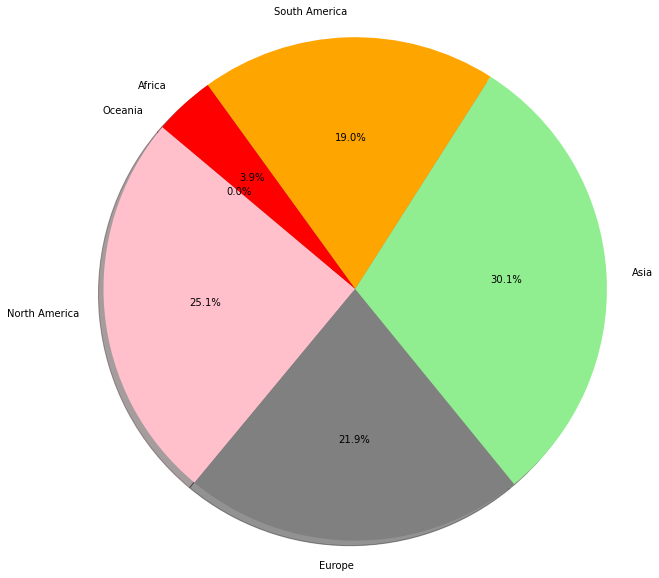

In [170]:
labels = 'North America', 'Europe', 'Asia','South America','Africa','Oceania'
sizes = [25.1, 21.9, 30.1,19,3.92,0.001]
colors = ['pink', 'gray', 'lightgreen','orange','red','lightblue']
explode = (0, 0, 0, 0, 0, 0)  # explode 1st slice

# Plot
fig = plt.figure(figsize =(10, 10)) 
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.savefig('continent_total_recovered.png')



plt.axis('equal')
plt.show()

In [171]:
continent.head()

Country  TotalCases  NewCases  TotalDeaths  NewDeaths  \
0  North America  27752890.0   21646.0     584846.0     1231.0   
1           Asia  21996795.0   19177.0     355970.0      315.0   
2  South America  14583895.0    2091.0     387297.0       25.0   
3         Europe  27372404.0   33372.0     624499.0      705.0   
4         Africa   3251235.0       NaN      78413.0        NaN   

   TotalRecovered  ActiveCases  Serious Critical  
0      17003703.0   10164341.0           36169.0  
1      20410157.0    1230668.0           24329.0  
2      12867944.0    1328654.0           19038.0  
3      14857753.0   11890152.0           29549.0  
4       2661465.0     511357.0            2644.0

In [172]:
continent_active_case = continent.groupby(by="Country")['ActiveCases'].sum().sort_values(ascending = False).head(10)

In [173]:
continent_active_case

Country
Europe           11890152.0
North America    10164341.0
South America     1328654.0
Asia              1230668.0
Africa             511357.0
Oceania             14728.0
Name: ActiveCases, dtype: float64

In [174]:
fig = px.pie(continent,values='ActiveCases',names='Country',color='Country',color_discrete_map={"North America":'brown',
                                                                                       "Europe":'teal',
                                                                                       "Asia":'orange',
                                                                                        "South America":'pink',
                                                                                        "Africa":'violet',
                                                                                        "Oceania":"lightblue"
                                                                                      },
             title="Continent_ActiveCases_PieChart"
            )
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

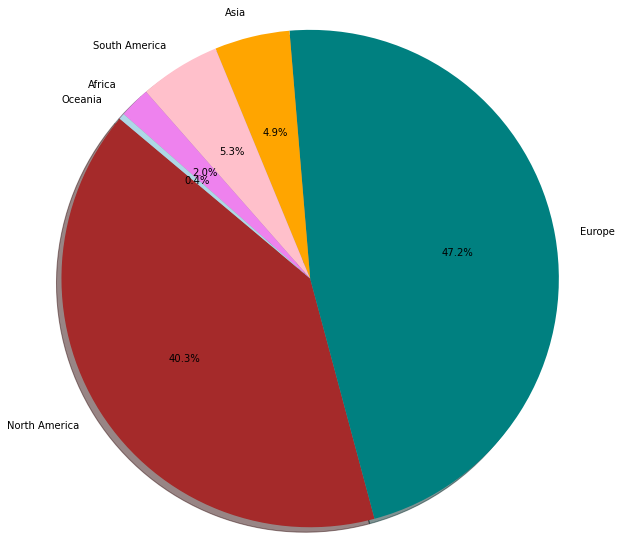

In [175]:
labels = 'North America', 'Europe', 'Asia','South America','Africa','Oceania'
sizes = [40.4, 47.3, 4.9,5.28,2.03,0.39]
colors = ['brown', 'teal', 'orange','pink','violet','lightblue']
explode = (0, 0, 0, 0, 0, 0)  # explode 1st slice

# Plot
fig = plt.figure(figsize =(10, 10)) 
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.savefig('contient_active_case.png')



plt.axis('equal')
plt.show()

## Now till now we have explored the continent wise dataset, let's now explore the country wise dataset for that I will be making the corona as the dataframe to represent the individual country.

In [176]:
corona = df.iloc[8:,:]

In [177]:
corona.head()

Country TotalCases NewCases TotalDeaths NewDeaths TotalRecovered  \
8      USA   24306043              405261                  14343644   
9    India   10558710              152311                  10196885   
10  Brazil    8456705              209350                   7388784   
11  Russia    3568209    23586      65566        481        2960431   
12      UK    3357361               88590                   1519106   

   ActiveCases Serious Critical Tot Cases/1M pop Deaths/1M pop Total Tests  \
8      9557138            28850            73198          1220   283753126   
9       209514             8944             7611           110   186544868   
10      858571             8318            39632           981    28600000   
11      542212             2300            24445           449    96600000   
12     1749665             3789            49315          1301    63139169   

   Tests/1M pop   Population  
8        854521   332060944   
9        134458  1387382566   
10       134032   213382578   
11       661786   145968697   
12       927419    68080521

In [178]:
corona['TotalCases'] = corona['TotalCases'].apply(lambda x:x.replace(',',''))

In [179]:
corona['NewCases'] = corona['NewCases'].apply(lambda x:x.replace('+','') .replace(',',''))

In [180]:
corona['TotalDeaths'] = corona['TotalDeaths'].apply(lambda x:x.replace(',',''))

In [181]:
corona['NewDeaths'] = corona['NewDeaths'].apply(lambda x:x.replace(',','').replace('+',''))

In [182]:
corona['TotalRecovered'] = corona['TotalRecovered'].apply(lambda x:x.replace(',','').replace('N/A',''))

In [183]:
corona['ActiveCases'] = corona['ActiveCases'].apply(lambda x:x.replace(',','').replace('N/A',''))

In [184]:
corona['Serious Critical'] = corona['Serious Critical'].apply(lambda x:x.replace(',',''))

In [185]:
corona['Tot Cases/1M pop'] = corona['Tot Cases/1M pop'].apply(lambda x:x.replace(',',''))

In [186]:
corona['Deaths/1M pop'] = corona['Deaths/1M pop'].apply(lambda x:x.replace(',',''))

In [187]:
corona['Total Tests'] = corona['Total Tests'].apply(lambda x:x.replace(',',''))

In [188]:
corona['Tests/1M pop'] = corona['Tests/1M pop'].apply(lambda x:x.replace(',',''))

In [189]:
corona['Population'] = corona['Population'].apply(lambda x:x.replace(',',''))

In [190]:
corona.head(20)

Country TotalCases NewCases TotalDeaths NewDeaths TotalRecovered  \
8            USA   24306043              405261                  14343644   
9          India   10558710              152311                  10196885   
10        Brazil    8456705              209350                   7388784   
11        Russia    3568209    23586      65566        481        2960431   
12            UK    3357361               88590                   1519106   
13        France    2894347               70142                    208071   
14        Turkey    2380665               23832                   2254052   
15         Italy    2368733               81800                   1729216   
16         Spain    2252164               53314                             
17       Germany    2038645               47121                   1657900   
18      Colombia    1891034               48256                   1711924   
19     Argentina    1791979               45295                   1573104   
20        Mexico    1630258    20523     140241       1219        1212403   
21        Poland    1429612               33213                   1181326   
22  South Africa    1325659               36851                   1083978   
23          Iran    1324395               56717                   1113224   
24       Ukraine    1154692               20686                    857183   
25          Peru    1060567               38770                    980000   
26     Indonesia     907929    11287      25987        220         736460   
27   Netherlands     906956               12965                             

   ActiveCases Serious Critical Tot Cases/1M pop Deaths/1M pop Total Tests  \
8      9557138            28850            73198          1220   283753126   
9       209514             8944             7611           110   186544868   
10      858571             8318            39632           981    28600000   
11      542212             2300            24445           449    96600000   
12     1749665             3789            49315          1301    63139169   
13     2616134             2740            44288          1073    39548718   
14      102781             2265            28063           281    27223445   
15      557717             2520            39209          1354    28994914   
16                         2953            48160          1140    28775103   
17      333624             5074            24290           561    36353196   
18      130854             3482            36950           943     9078811   
19      173580             3578            39452           997     5511604   
20      277614             5174            12572          1082     4100111   
21      215073             1651            37797           878     8014701   
22      204830              546            22200           617     7558774   
23      154454             4393            15659           671     8475495   
24      276823              177            26490           475     5934439   
25       41797             1639            31925          1167     5844283   
26      145482                              3300            94     8269701   
27                          671            52866           756     6352647   

   Tests/1M pop   Population  
8        854521   332060944   
9        134458  1387382566   
10       134032   213382578   
11       661786   145968697   
12       927419    68080521   
13       605160    65352445   
14       320909    84832278   
15       479944    60413129   
16       615317    46764686   
17       433136    83930260   
18       177398    51177656   
19       121344    45421405   
20        31620   129669070   
21       211895    37823912   
22       126582    59714562   
23       100211    84576397   
24       136144    43589461   
25       175922    33220925   
26        30061   275095699   
27       370296    17155592

In [191]:
corona = corona.replace(r'^\s*$', np.NaN, regex=True)


In [192]:
corona.head(10)

Country TotalCases NewCases TotalDeaths NewDeaths TotalRecovered  \
8       USA   24306043      NaN     405261        NaN       14343644   
9     India   10558710      NaN     152311        NaN       10196885   
10   Brazil    8456705      NaN     209350        NaN        7388784   
11   Russia    3568209    23586      65566        481        2960431   
12       UK    3357361      NaN      88590        NaN        1519106   
13   France    2894347      NaN      70142        NaN         208071   
14   Turkey    2380665      NaN      23832        NaN        2254052   
15    Italy    2368733      NaN      81800        NaN        1729216   
16    Spain    2252164      NaN      53314        NaN            NaN   
17  Germany    2038645      NaN      47121        NaN        1657900   

   ActiveCases Serious Critical Tot Cases/1M pop Deaths/1M pop Total Tests  \
8      9557138            28850            73198          1220   283753126   
9       209514             8944             7611           110   186544868   
10      858571             8318            39632           981    28600000   
11      542212             2300            24445           449    96600000   
12     1749665             3789            49315          1301    63139169   
13     2616134             2740            44288          1073    39548718   
14      102781             2265            28063           281    27223445   
15      557717             2520            39209          1354    28994914   
16         NaN             2953            48160          1140    28775103   
17      333624             5074            24290           561    36353196   

   Tests/1M pop   Population  
8        854521   332060944   
9        134458  1387382566   
10       134032   213382578   
11       661786   145968697   
12       927419    68080521   
13       605160    65352445   
14       320909    84832278   
15       479944    60413129   
16       615317    46764686   
17       433136    83930260

In [193]:
for label,content in corona.items():
    if pd.api.types.is_object_dtype(content):
        print(label)

Country
TotalCases
NewCases
TotalDeaths
NewDeaths
TotalRecovered
ActiveCases
Serious Critical
Tot Cases/1M pop
Deaths/1M pop
Total Tests
Tests/1M pop
Population


>> Still our country dataset are in object format

In [194]:
corona.dtypes

Country             object
TotalCases          object
NewCases            object
TotalDeaths         object
NewDeaths           object
TotalRecovered      object
ActiveCases         object
Serious Critical    object
Tot Cases/1M pop    object
Deaths/1M pop       object
Total Tests         object
Tests/1M pop        object
Population          object
dtype: object

In [195]:
corona['TotalCases'] = corona['TotalCases'].astype(str).astype('float')

In [196]:
corona['NewCases'] = corona['NewCases'].astype(str).astype('float')

In [197]:
corona['TotalDeaths'] = corona['TotalDeaths'].astype(str).astype('float')

In [198]:
corona['NewDeaths'] = corona['NewDeaths'].astype(str).astype('float')

In [199]:
corona.isna().sum()

Country               0
TotalCases            0
NewCases            191
TotalDeaths          18
NewDeaths           203
TotalRecovered        4
ActiveCases           3
Serious Critical     75
Tot Cases/1M pop      2
Deaths/1M pop        20
Total Tests          19
Tests/1M pop         19
Population            2
dtype: int64

In [200]:
corona['TotalRecovered'] = corona['TotalRecovered'].astype(str).astype('float')

In [201]:
corona['ActiveCases'] = corona['ActiveCases'].astype(str).astype('float')

In [202]:
corona['Serious Critical'] = corona['Serious Critical'].astype(str).astype('float')

In [203]:
corona['Tot Cases/1M pop'] = corona['Tot Cases/1M pop'].astype(str).astype('float')

In [204]:
corona['Deaths/1M pop'] = corona['Deaths/1M pop'].astype(str).astype('float')

In [205]:
corona['Total Tests'] = corona['Total Tests'].astype(str).astype('float')

In [206]:
corona['Tests/1M pop'] = corona['Tests/1M pop'].astype(str).astype('float')

In [207]:
corona['Population'] = corona['Population'].astype(str).astype('float')

In [208]:
for label,content in corona.items():
    if pd.api.types.is_object_dtype(content):
        print(label)

Country


In [209]:
corona.head()

Country  TotalCases  NewCases  TotalDeaths  NewDeaths  TotalRecovered  \
8      USA  24306043.0       NaN     405261.0        NaN      14343644.0   
9    India  10558710.0       NaN     152311.0        NaN      10196885.0   
10  Brazil   8456705.0       NaN     209350.0        NaN       7388784.0   
11  Russia   3568209.0   23586.0      65566.0      481.0       2960431.0   
12      UK   3357361.0       NaN      88590.0        NaN       1519106.0   

    ActiveCases  Serious Critical  Tot Cases/1M pop  Deaths/1M pop  \
8     9557138.0           28850.0           73198.0         1220.0   
9      209514.0            8944.0            7611.0          110.0   
10     858571.0            8318.0           39632.0          981.0   
11     542212.0            2300.0           24445.0          449.0   
12    1749665.0            3789.0           49315.0         1301.0   

    Total Tests  Tests/1M pop    Population  
8   283753126.0      854521.0  3.320609e+08  
9   186544868.0      134458.0  1.387383e+09  
10   28600000.0      134032.0  2.133826e+08  
11   96600000.0      661786.0  1.459687e+08  
12   63139169.0      927419.0  6.808052e+07

In [210]:
corona.tail(80)

Country  TotalCases  NewCases  TotalDeaths  NewDeaths  \
149             Guyana      6851.0       NaN        170.0        NaN   
150            Mayotte      6611.0       NaN         58.0        NaN   
151              Aruba      6405.0       NaN         52.0        NaN   
152            Lesotho      6371.0       NaN         93.0        NaN   
153         Martinique      6263.0       NaN         44.0        NaN   
..                 ...         ...       ...          ...        ...   
224  Wallis and Futuna         4.0       NaN          NaN        NaN   
225              Samoa         2.0       NaN          NaN        NaN   
226         Micronesia         1.0       NaN          NaN        NaN   
227            Vanuatu         1.0       NaN          NaN        NaN   
228              China     88227.0     109.0       4635.0        NaN   

     TotalRecovered  ActiveCases  Serious Critical  Tot Cases/1M pop  \
149          6126.0        555.0               5.0            8687.0   
150          2964.0       3589.0               3.0           23922.0   
151          5829.0        524.0              11.0           59853.0   
152          1635.0       4643.0               NaN            2961.0   
153            98.0       6121.0               2.0           16697.0   
..              ...          ...               ...               ...   
224             1.0          3.0               NaN             359.0   
225             2.0          0.0               NaN              10.0   
226             NaN          1.0               NaN               9.0   
227             1.0          0.0               NaN               3.0   
228         82387.0       1205.0              42.0              61.0   

     Deaths/1M pop  Total Tests  Tests/1M pop    Population  
149          216.0      43899.0       55665.0  7.886230e+05  
150          210.0      42849.0      155049.0  2.763580e+05  
151          486.0      75972.0      709932.0  1.070130e+05  
152           43.0      42603.0       19802.0  2.151496e+06  
153          117.0      79166.0      211050.0  3.751060e+05  
..             ...          ...           ...           ...  
224            NaN       1149.0      103235.0  1.113000e+04  
225            NaN          NaN           NaN  1.991320e+05  
226            NaN          NaN           NaN  1.156780e+05  
227            NaN        470.0        1511.0  3.110110e+05  
228            3.0  160000000.0      111163.0  1.439324e+09  

[80 rows x 13 columns]

In [211]:
corona.describe()

TotalCases      NewCases    TotalDeaths    NewDeaths  TotalRecovered  \
count  2.210000e+02     30.000000     203.000000    18.000000    2.170000e+02   
mean   4.298982e+05   2543.866667   10010.399015   126.444444    3.115942e+05   
std    1.921429e+06   5760.523065   36977.486291   296.494464    1.331306e+06   
min    1.000000e+00      2.000000       1.000000     2.000000    1.000000e+00   
25%    2.383000e+03     36.250000      65.500000     5.750000    1.701000e+03   
50%    2.069300e+04    382.000000     431.000000    21.000000    1.351900e+04   
75%    1.772310e+05   1731.500000    3573.500000    61.250000    1.413740e+05   
max    2.430604e+07  23586.000000  405261.000000  1219.000000    1.434364e+07   

        ActiveCases  Serious Critical  Tot Cases/1M pop  Deaths/1M pop  \
count  2.180000e+02        146.000000        219.000000     201.000000   
mean   9.978639e+04        765.390411      18239.347032     332.227861   
std    6.842281e+05       2708.355046      22518.649128     423.377757   
min    0.000000e+00          1.000000          3.000000       0.200000   
25%    2.092500e+02          9.250000       1071.500000      20.000000   
50%    3.073000e+03         63.000000       8687.000000     111.000000   
75%    2.279975e+04        342.750000      29367.000000     475.000000   
max    9.557138e+06      28850.000000     116871.000000    1913.000000   

        Total Tests  Tests/1M pop    Population  
count  2.020000e+02  2.020000e+02  2.190000e+02  
mean   6.612526e+06  3.534426e+05  3.561901e+07  
std    2.769118e+07  6.050354e+05  1.401282e+08  
min    4.700000e+02  5.770000e+02  8.020000e+02  
25%    7.776575e+04  3.921825e+04  6.428140e+05  
50%    5.883665e+05  1.515730e+05  6.582460e+06  
75%    2.901590e+06  4.172505e+05  2.425720e+07  
max    2.837531e+08  4.375909e+06  1.439324e+09

In [212]:
corona.head()

Country  TotalCases  NewCases  TotalDeaths  NewDeaths  TotalRecovered  \
8      USA  24306043.0       NaN     405261.0        NaN      14343644.0   
9    India  10558710.0       NaN     152311.0        NaN      10196885.0   
10  Brazil   8456705.0       NaN     209350.0        NaN       7388784.0   
11  Russia   3568209.0   23586.0      65566.0      481.0       2960431.0   
12      UK   3357361.0       NaN      88590.0        NaN       1519106.0   

    ActiveCases  Serious Critical  Tot Cases/1M pop  Deaths/1M pop  \
8     9557138.0           28850.0           73198.0         1220.0   
9      209514.0            8944.0            7611.0          110.0   
10     858571.0            8318.0           39632.0          981.0   
11     542212.0            2300.0           24445.0          449.0   
12    1749665.0            3789.0           49315.0         1301.0   

    Total Tests  Tests/1M pop    Population  
8   283753126.0      854521.0  3.320609e+08  
9   186544868.0      134458.0  1.387383e+09  
10   28600000.0      134032.0  2.133826e+08  
11   96600000.0      661786.0  1.459687e+08  
12   63139169.0      927419.0  6.808052e+07

In [213]:
for label,content in corona.items():
    if pd.api.types.is_object_dtype(content):
        print(label)

Country


In [214]:
for label,content in corona.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

TotalCases
NewCases
TotalDeaths
NewDeaths
TotalRecovered
ActiveCases
Serious Critical
Tot Cases/1M pop
Deaths/1M pop
Total Tests
Tests/1M pop
Population


In [215]:
corona['TotalCases'].max()

24306043.0

In [216]:
total_cases = corona['TotalCases'].sum()
total_cases

95007500.0

# Highlighting our corona DataFrame and here we can observe that darker the value in cell, the more the number of cases in the datasets usinf background gradient.

In [217]:
corona.style.background_gradient(cmap="Reds")

* Here, no doubt that USA is highlighted with dark red color because of having the maximum number of cases, deaths, recovered and so on followed by India and Brazil. For that we will use plotly express as px which is high level interface of plotly.

In [218]:
fig = px.choropleth(corona,locations="Country",
                    locationmode='country names',
                    hover_name='Country',
                    color='ActiveCases',
                    title='Active Cases Countries',
                    color_continuous_scale='picnic')
fig.show()


* The country with red color indicated the country with maximum number of cases. From map, it is clear that USA which lies in the North Continent has the maxmimum number of active cases.

In [219]:
fig = px.choropleth(corona,locations="Country",
                    locationmode='country names',
                    hover_name='Country',
                    color='Serious Critical',
                    title="Critical Cases Countries",
                    color_continuous_scale='picnic')
fig.show()

* We can see that the most critical case is in USA

## Let's observe the top 10 countries with highest number of total cases

In [220]:
highest_total_top_10_countries = corona.groupby(by="Country")['TotalCases'].sum().sort_values(ascending = False).head(10)

In [221]:
highest_total_top_10_countries

Country
USA        24306043.0
India      10558710.0
Brazil      8456705.0
Russia      3568209.0
UK          3357361.0
France      2894347.0
Turkey      2380665.0
Italy       2368733.0
Spain       2252164.0
Germany     2038645.0
Name: TotalCases, dtype: float64

In [222]:
highest_total_top_10_countries= corona[(corona['Country']=='USA') | (corona['Country']=='India')|(corona['Country']=='Brazil')|
                                    (corona['Country']=='Russia')|(corona['Country']=='UK')|(corona['Country']=='France')|
                                     (corona['Country']=='Turkey')|(corona['Country']=='Italy')|(corona['Country']=='Spain')|
                                     (corona['Country']=='Germany')]

In [223]:
highest_total_top_10_countries

Country  TotalCases  NewCases  TotalDeaths  NewDeaths  TotalRecovered  \
8       USA  24306043.0       NaN     405261.0        NaN      14343644.0   
9     India  10558710.0       NaN     152311.0        NaN      10196885.0   
10   Brazil   8456705.0       NaN     209350.0        NaN       7388784.0   
11   Russia   3568209.0   23586.0      65566.0      481.0       2960431.0   
12       UK   3357361.0       NaN      88590.0        NaN       1519106.0   
13   France   2894347.0       NaN      70142.0        NaN        208071.0   
14   Turkey   2380665.0       NaN      23832.0        NaN       2254052.0   
15    Italy   2368733.0       NaN      81800.0        NaN       1729216.0   
16    Spain   2252164.0       NaN      53314.0        NaN             NaN   
17  Germany   2038645.0       NaN      47121.0        NaN       1657900.0   

    ActiveCases  Serious Critical  Tot Cases/1M pop  Deaths/1M pop  \
8     9557138.0           28850.0           73198.0         1220.0   
9      209514.0            8944.0            7611.0          110.0   
10     858571.0            8318.0           39632.0          981.0   
11     542212.0            2300.0           24445.0          449.0   
12    1749665.0            3789.0           49315.0         1301.0   
13    2616134.0            2740.0           44288.0         1073.0   
14     102781.0            2265.0           28063.0          281.0   
15     557717.0            2520.0           39209.0         1354.0   
16          NaN            2953.0           48160.0         1140.0   
17     333624.0            5074.0           24290.0          561.0   

    Total Tests  Tests/1M pop    Population  
8   283753126.0      854521.0  3.320609e+08  
9   186544868.0      134458.0  1.387383e+09  
10   28600000.0      134032.0  2.133826e+08  
11   96600000.0      661786.0  1.459687e+08  
12   63139169.0      927419.0  6.808052e+07  
13   39548718.0      605160.0  6.535244e+07  
14   27223445.0      320909.0  8.483228e+07  
15   28994914.0      479944.0  6.041313e+07  
16   28775103.0      615317.0  4.676469e+07  
17   36353196.0      433136.0  8.393026e+07

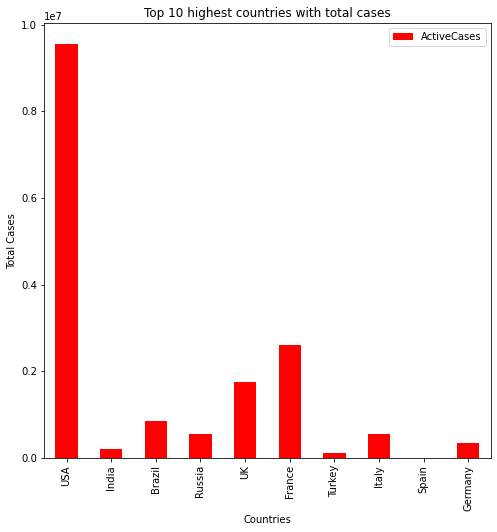

In [224]:
highest_total_top_10_countries.plot(x="Country",y="ActiveCases",figsize=(8,8),kind="bar",color="red")
plt.xlabel("Countries")
plt.ylabel("Total Cases")
plt.title("Top 10 highest countries with total cases")
plt.show()

In [225]:
## The same diagram can be made more visualize as follows:

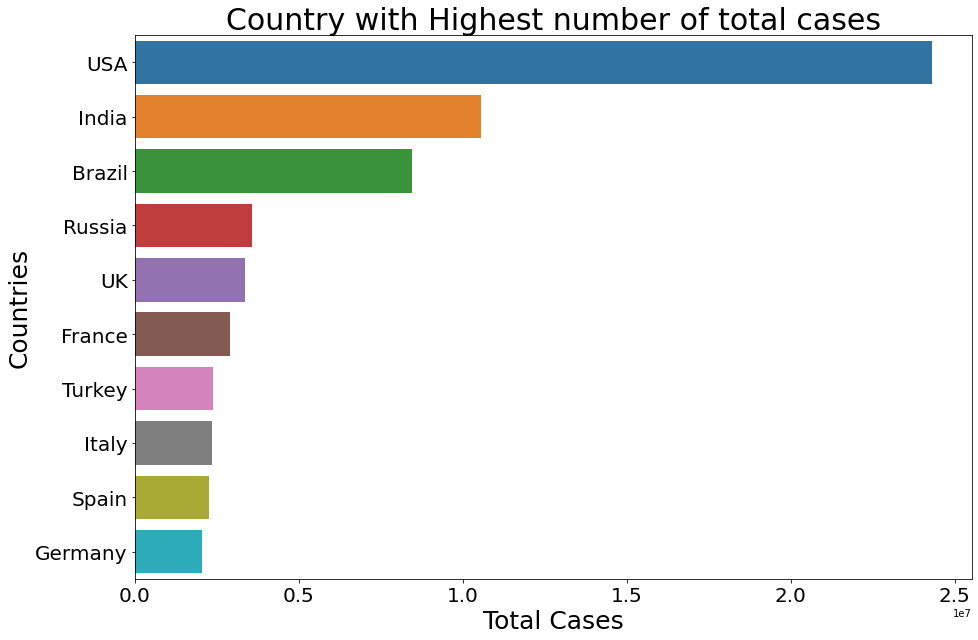

In [226]:
fig, ax = plt.subplots(figsize=(15,10))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title("Country with Highest number of total cases",fontsize=30)
plt.xlabel("Serious Critical",fontsize=25)
plt.ylabel("country",fontsize=25)
ax = sns.barplot(x ="TotalCases",y="Country",data=highest_total_top_10_countries)
ax.set(xlabel="Total Cases",ylabel="Countries")
plt.savefig('country_highest_total_cases.png')
plt.show()


* So, the top countries with total number of corona cases are USA, India, Brazil

## Let's observe the top 10 countries with highest active case

In [227]:
highest_activecase_top_10_countries = corona.groupby(by="Country")['ActiveCases'].sum().sort_values(ascending = False).head(10)

In [228]:
highest_activecase_top_10_countries

Country
USA        9557138.0
France     2616134.0
UK         1749665.0
Brazil      858571.0
Belgium     609854.0
Italy       557717.0
Russia      542212.0
Serbia      335950.0
Germany     333624.0
Mexico      277614.0
Name: ActiveCases, dtype: float64

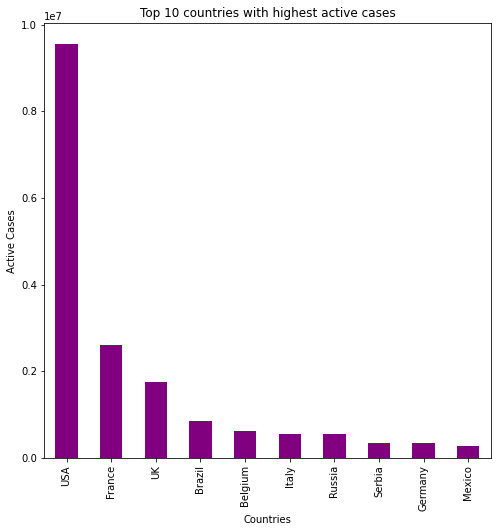

In [229]:
highest_activecase_top_10_countries.plot(x="Country",y="ActiveCases",figsize=(8,8),kind="bar",color="purple")
plt.xlabel("Countries")
plt.ylabel("Active Cases")
plt.title("Top 10 countries with highest active cases")
plt.show()


In [230]:
highest_top_10_countries_deaths = corona.groupby(by="Country")['TotalDeaths'].sum().sort_values(ascending = False).head(10)

In [231]:
highest_top_10_countries_deaths

Country
USA       405261.0
Brazil    209350.0
India     152311.0
Mexico    140241.0
UK         88590.0
Italy      81800.0
France     70142.0
Russia     65566.0
Iran       56717.0
Spain      53314.0
Name: TotalDeaths, dtype: float64

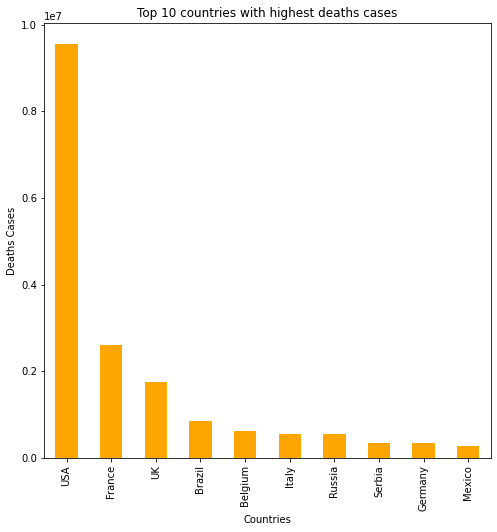

In [232]:
highest_activecase_top_10_countries.plot(x="Country",y="DeathCases",figsize=(8,8),kind="bar",color="orange")
plt.xlabel("Countries")
plt.ylabel("Deaths Cases")
plt.title("Top 10 countries with highest deaths cases")
plt.show()

In [233]:
corona.head()

Country  TotalCases  NewCases  TotalDeaths  NewDeaths  TotalRecovered  \
8      USA  24306043.0       NaN     405261.0        NaN      14343644.0   
9    India  10558710.0       NaN     152311.0        NaN      10196885.0   
10  Brazil   8456705.0       NaN     209350.0        NaN       7388784.0   
11  Russia   3568209.0   23586.0      65566.0      481.0       2960431.0   
12      UK   3357361.0       NaN      88590.0        NaN       1519106.0   

    ActiveCases  Serious Critical  Tot Cases/1M pop  Deaths/1M pop  \
8     9557138.0           28850.0           73198.0         1220.0   
9      209514.0            8944.0            7611.0          110.0   
10     858571.0            8318.0           39632.0          981.0   
11     542212.0            2300.0           24445.0          449.0   
12    1749665.0            3789.0           49315.0         1301.0   

    Total Tests  Tests/1M pop    Population  
8   283753126.0      854521.0  3.320609e+08  
9   186544868.0      134458.0  1.387383e+09  
10   28600000.0      134032.0  2.133826e+08  
11   96600000.0      661786.0  1.459687e+08  
12   63139169.0      927419.0  6.808052e+07

## Lets visualize the top threee countries distribution in pie chart

In [234]:
us_india_brazil = corona.head(3)

In [235]:
us_india_brazil

Country  TotalCases  NewCases  TotalDeaths  NewDeaths  TotalRecovered  \
8      USA  24306043.0       NaN     405261.0        NaN      14343644.0   
9    India  10558710.0       NaN     152311.0        NaN      10196885.0   
10  Brazil   8456705.0       NaN     209350.0        NaN       7388784.0   

    ActiveCases  Serious Critical  Tot Cases/1M pop  Deaths/1M pop  \
8     9557138.0           28850.0           73198.0         1220.0   
9      209514.0            8944.0            7611.0          110.0   
10     858571.0            8318.0           39632.0          981.0   

    Total Tests  Tests/1M pop    Population  
8   283753126.0      854521.0  3.320609e+08  
9   186544868.0      134458.0  1.387383e+09  
10   28600000.0      134032.0  2.133826e+08

In [236]:
fig = px.pie(us_india_brazil, values='TotalCases', names='Country',color='Country',color_discrete_map={"USA":'red',
                                                                                       "India":'orange',
                                                                                       "Brazil":'gray'
                                                                                      },
             title="Total_Cases_PieChart"
            )
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

* So out of 100% total cases among three countries, USA share 56.1% of the data, India with 24.4% data and Brazil with 19.5% data.

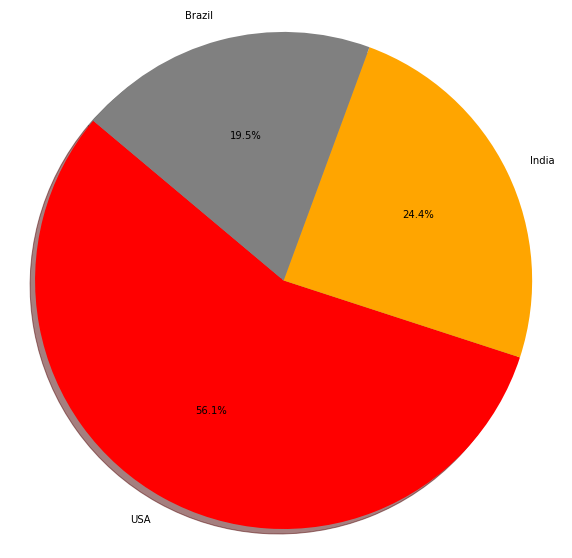

In [237]:
# Data to plot
labels = 'USA', 'India', 'Brazil'
sizes = [56.1, 24.4, 19.5]
colors = ['red', 'orange', 'gray']
explode = (0, 0, 0)  # explode 1st slice

# Plot
fig = plt.figure(figsize =(10, 10)) 
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.savefig('us_brazil_india.png')


plt.axis('equal')
plt.show()

In [238]:
## Similary visualinzg their(USA_India_Brazil) active population
fig = px.pie(us_india_brazil, values='ActiveCases', names='Country',color='Country',color_discrete_map={"USA":'lightblue',
                                                                                       "India":'pink',
                                                                                       "Brazil":'teal'
                                                                                      },
             title="Active_Case_PieChart"
            )
fig.update_traces(textposition='inside', textinfo='percent+label')

fig.show()

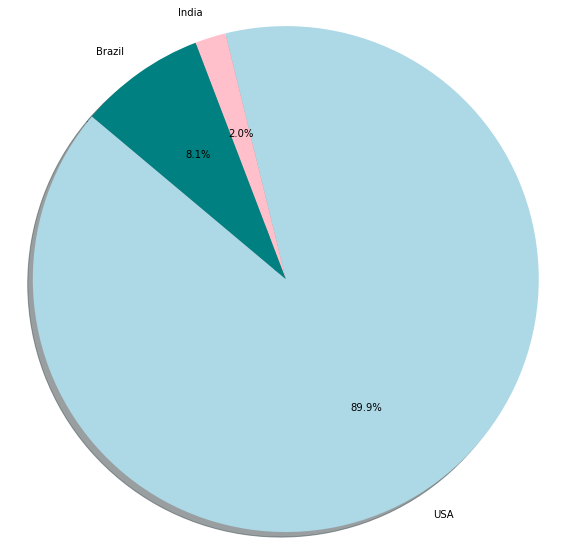

In [239]:
# Data to plot
labels = 'USA', 'India', 'Brazil'
sizes = [89.9, 1.97, 8.08]
colors = ['lightblue', 'pink', 'teal']
explode = (0, 0, 0)  #Stopping the explode

# Plot
fig = plt.figure(figsize =(10, 10)) 
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.savefig('us_brazil_india.png')


plt.axis('equal')
plt.show()

## Now lets just step back and observe the least affected countries cases.

In [240]:
least_afftected_countries = corona.groupby(by="Country")['TotalCases'].sum().sort_values(ascending = True).head(3)

In [241]:
least_afftected_countries

Country
Vanuatu       1.0
Micronesia    1.0
Samoa         2.0
Name: TotalCases, dtype: float64

* It seems that Vanuatu, Micronesia and Samoa are the countries with least numbrt of total cases.

In [242]:
df_least_affected_countries = corona[(corona['Country']=='Vanuatu') | (corona['Country']=='Micronesia')|(corona['Country']=='Samoa')]

In [243]:
df_least_affected_countries

Country  TotalCases  NewCases  TotalDeaths  NewDeaths  TotalRecovered  \
225       Samoa         2.0       NaN          NaN        NaN             2.0   
226  Micronesia         1.0       NaN          NaN        NaN             NaN   
227     Vanuatu         1.0       NaN          NaN        NaN             1.0   

     ActiveCases  Serious Critical  Tot Cases/1M pop  Deaths/1M pop  \
225          0.0               NaN              10.0            NaN   
226          1.0               NaN               9.0            NaN   
227          0.0               NaN               3.0            NaN   

     Total Tests  Tests/1M pop  Population  
225          NaN           NaN    199132.0  
226          NaN           NaN    115678.0  
227        470.0        1511.0    311011.0

In [244]:
## Observing their(least countires) active cases.

In [245]:
fig = px.pie(df_least_affected_countries, values='ActiveCases', names='Country',color='Country',color_discrete_map={"Samoa":'red',
                                                                                       "Micronsia":'orange',
                                                                                       "Vanautu":'gray'
                                                                                      },
             title="Total_Cases_PieChart"
            )
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

* This char is very interesting as from the data we can see that Micronnseia has only one active cases while Samoa and Vanuatu have zero number of cases. From this chart we can conclude that, Micronseia, Samoa and Vanuatau have done well to maintian the cases of Covid in their countries.

In [246]:
corona.head()

Country  TotalCases  NewCases  TotalDeaths  NewDeaths  TotalRecovered  \
8      USA  24306043.0       NaN     405261.0        NaN      14343644.0   
9    India  10558710.0       NaN     152311.0        NaN      10196885.0   
10  Brazil   8456705.0       NaN     209350.0        NaN       7388784.0   
11  Russia   3568209.0   23586.0      65566.0      481.0       2960431.0   
12      UK   3357361.0       NaN      88590.0        NaN       1519106.0   

    ActiveCases  Serious Critical  Tot Cases/1M pop  Deaths/1M pop  \
8     9557138.0           28850.0           73198.0         1220.0   
9      209514.0            8944.0            7611.0          110.0   
10     858571.0            8318.0           39632.0          981.0   
11     542212.0            2300.0           24445.0          449.0   
12    1749665.0            3789.0           49315.0         1301.0   

    Total Tests  Tests/1M pop    Population  
8   283753126.0      854521.0  3.320609e+08  
9   186544868.0      134458.0  1.387383e+09  
10   28600000.0      134032.0  2.133826e+08  
11   96600000.0      661786.0  1.459687e+08  
12   63139169.0      927419.0  6.808052e+07

### Also there is the number of population given in our dataset, so let's visualize it as well. This is not exactly related to Covid but its a kind of General Knowledge to know which country has the highest numbrt of populatio and we all know China is the one with highest number of population.

In [247]:
highest_population = corona.groupby(by="Country")['Population'].sum().sort_values(ascending = False).head(3)

In [248]:
highest_population.value_counts

<bound method IndexOpsMixin.value_counts of Country
China    1.439324e+09
India    1.387383e+09
USA      3.320609e+08
Name: Population, dtype: float64>

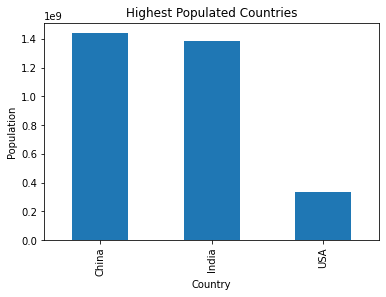

In [249]:
highest_population.plot(x="Country",y="Population",kind="bar")
plt.title("Highest Populated Countries")
plt.xlabel("Country")
plt.ylabel("Population");

## Also lets oberve least populated countries

In [250]:
least_population = corona.groupby(by="Country")['Population'].sum().sort_values(ascending = True).head(3)

In [251]:
least_population

Country
MS Zaandam            0.0
Diamond Princess      0.0
Vatican City        802.0
Name: Population, dtype: float64

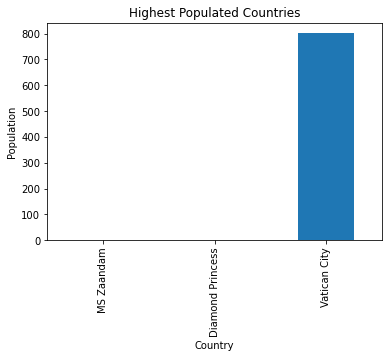

In [252]:
least_population.plot(x="Country",y="Population",kind="bar")
plt.title("Highest Populated Countries")
plt.xlabel("Country")
plt.ylabel("Population");

In [253]:
corona.head()

Country  TotalCases  NewCases  TotalDeaths  NewDeaths  TotalRecovered  \
8      USA  24306043.0       NaN     405261.0        NaN      14343644.0   
9    India  10558710.0       NaN     152311.0        NaN      10196885.0   
10  Brazil   8456705.0       NaN     209350.0        NaN       7388784.0   
11  Russia   3568209.0   23586.0      65566.0      481.0       2960431.0   
12      UK   3357361.0       NaN      88590.0        NaN       1519106.0   

    ActiveCases  Serious Critical  Tot Cases/1M pop  Deaths/1M pop  \
8     9557138.0           28850.0           73198.0         1220.0   
9      209514.0            8944.0            7611.0          110.0   
10     858571.0            8318.0           39632.0          981.0   
11     542212.0            2300.0           24445.0          449.0   
12    1749665.0            3789.0           49315.0         1301.0   

    Total Tests  Tests/1M pop    Population  
8   283753126.0      854521.0  3.320609e+08  
9   186544868.0      134458.0  1.387383e+09  
10   28600000.0      134032.0  2.133826e+08  
11   96600000.0      661786.0  1.459687e+08  
12   63139169.0      927419.0  6.808052e+07

In [254]:
## Visualizing the countries with highest number of critical cases.

In [255]:
critical_case = corona.groupby(by="Country")['Serious Critical'].sum().sort_values(ascending = False).head(10)

In [256]:
critical_case

Country
USA          28850.0
India         8944.0
Brazil        8318.0
Mexico        5174.0
Germany       5074.0
Iran          4393.0
UK            3789.0
Argentina     3578.0
Colombia      3482.0
Spain         2953.0
Name: Serious Critical, dtype: float64

In [257]:
## Making the dataframe of critical countries

In [258]:
critical_countries= corona[(corona['Country']=='USA') | (corona['Country']=='India')|(corona['Country']=='Brazil')|
                                    (corona['Country']=='Mexico')|(corona['Country']=='Germany')|(corona['Country']=='Iran')|
                                     (corona['Country']=='UK')|(corona['Country']=='Argentina')|(corona['Country']=='Colombia')|
                                     (corona['Country']=='Spain')]
                                     
                                    

In [259]:
critical_countries

Country  TotalCases  NewCases  TotalDeaths  NewDeaths  TotalRecovered  \
8         USA  24306043.0       NaN     405261.0        NaN      14343644.0   
9       India  10558710.0       NaN     152311.0        NaN      10196885.0   
10     Brazil   8456705.0       NaN     209350.0        NaN       7388784.0   
12         UK   3357361.0       NaN      88590.0        NaN       1519106.0   
16      Spain   2252164.0       NaN      53314.0        NaN             NaN   
17    Germany   2038645.0       NaN      47121.0        NaN       1657900.0   
18   Colombia   1891034.0       NaN      48256.0        NaN       1711924.0   
19  Argentina   1791979.0       NaN      45295.0        NaN       1573104.0   
20     Mexico   1630258.0   20523.0     140241.0     1219.0       1212403.0   
23       Iran   1324395.0       NaN      56717.0        NaN       1113224.0   

    ActiveCases  Serious Critical  Tot Cases/1M pop  Deaths/1M pop  \
8     9557138.0           28850.0           73198.0         1220.0   
9      209514.0            8944.0            7611.0          110.0   
10     858571.0            8318.0           39632.0          981.0   
12    1749665.0            3789.0           49315.0         1301.0   
16          NaN            2953.0           48160.0         1140.0   
17     333624.0            5074.0           24290.0          561.0   
18     130854.0            3482.0           36950.0          943.0   
19     173580.0            3578.0           39452.0          997.0   
20     277614.0            5174.0           12572.0         1082.0   
23     154454.0            4393.0           15659.0          671.0   

    Total Tests  Tests/1M pop    Population  
8   283753126.0      854521.0  3.320609e+08  
9   186544868.0      134458.0  1.387383e+09  
10   28600000.0      134032.0  2.133826e+08  
12   63139169.0      927419.0  6.808052e+07  
16   28775103.0      615317.0  4.676469e+07  
17   36353196.0      433136.0  8.393026e+07  
18    9078811.0      177398.0  5.117766e+07  
19    5511604.0      121344.0  4.542140e+07  
20    4100111.0       31620.0  1.296691e+08  
23    8475495.0      100211.0  8.457640e+07

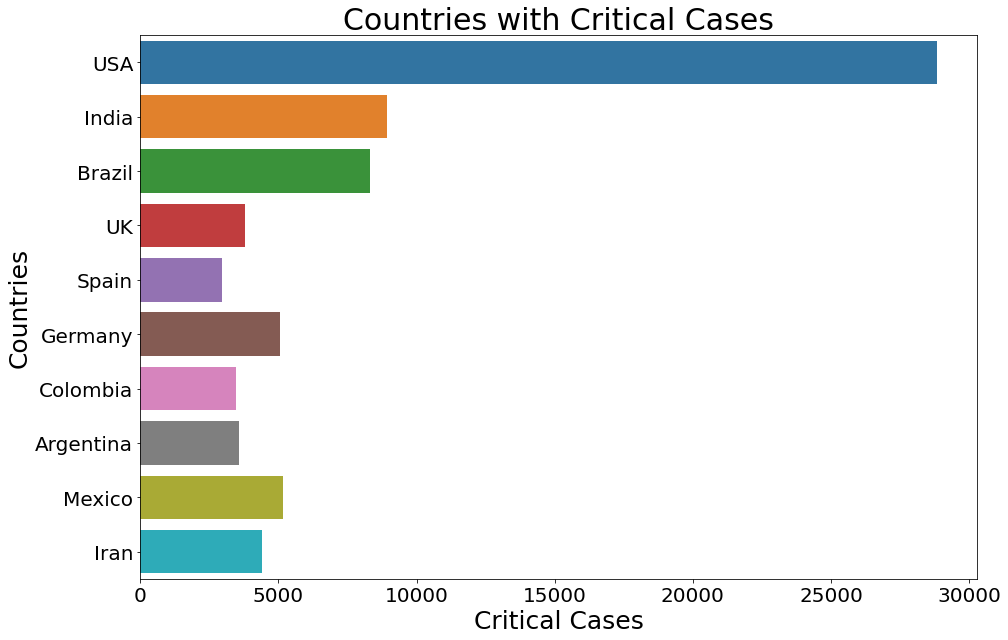

In [260]:
fig, ax = plt.subplots(figsize=(15,10))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title("Countries with Critical Cases",fontsize=30)
plt.xlabel("Serious Critical",fontsize=25)
plt.ylabel("country",fontsize=25)
ax = sns.barplot(x = "Serious Critical",y="Country",data=critical_countries )
ax.set(xlabel="Critical Cases",ylabel="Countries")
plt.savefig("countries_critical_cases.png")
plt.show()


In [261]:
corona.head()

Country  TotalCases  NewCases  TotalDeaths  NewDeaths  TotalRecovered  \
8      USA  24306043.0       NaN     405261.0        NaN      14343644.0   
9    India  10558710.0       NaN     152311.0        NaN      10196885.0   
10  Brazil   8456705.0       NaN     209350.0        NaN       7388784.0   
11  Russia   3568209.0   23586.0      65566.0      481.0       2960431.0   
12      UK   3357361.0       NaN      88590.0        NaN       1519106.0   

    ActiveCases  Serious Critical  Tot Cases/1M pop  Deaths/1M pop  \
8     9557138.0           28850.0           73198.0         1220.0   
9      209514.0            8944.0            7611.0          110.0   
10     858571.0            8318.0           39632.0          981.0   
11     542212.0            2300.0           24445.0          449.0   
12    1749665.0            3789.0           49315.0         1301.0   

    Total Tests  Tests/1M pop    Population  
8   283753126.0      854521.0  3.320609e+08  
9   186544868.0      134458.0  1.387383e+09  
10   28600000.0      134032.0  2.133826e+08  
11   96600000.0      661786.0  1.459687e+08  
12   63139169.0      927419.0  6.808052e+07

## The new_cases are seen dynamically. That means, for the time I am writing this notebook the new cases changes frequently.

In [262]:
new_cases = corona.groupby(by="Country")['NewCases'].sum().sort_values(ascending = False).head(9)

In [263]:
new_cases

Country
Russia         23586.0
Mexico         20523.0
Indonesia      11287.0
Czechia         5199.0
Pakistan        2521.0
Belgium         2120.0
Bolivia         2091.0
Philippines     1895.0
Hungary         1241.0
Name: NewCases, dtype: float64

* Right now, Mexico has the highest number of new case with the count of 20523

In [264]:
new_updated_cases= corona[(corona['Country']=='Mexico') | (corona['Country']=='Bolivia')|(corona['Country']=='S.Korea')|
                                    (corona['Country']=='China')|(corona['Country']=='Australia')|(corona['Country']=='New Zealand')|
                                     (corona['Country']=='Zimbabwe')|(corona['Country']=='Gibraltar')|(corona['Country']=='Ghana')]
                                     

In [265]:
new_updated_cases

Country  TotalCases  NewCases  TotalDeaths  NewDeaths  \
20        Mexico   1630258.0   20523.0     140241.0     1219.0   
61       Bolivia    185680.0    2091.0       9596.0       25.0   
96         Ghana     56981.0       NaN        341.0        NaN   
110    Australia     28707.0      18.0        909.0        NaN   
112     Zimbabwe     26881.0       NaN        683.0        NaN   
165    Gibraltar      3637.0       NaN         34.0        NaN   
173  New Zealand      2256.0      10.0         25.0        NaN   
228        China     88227.0     109.0       4635.0        NaN   

     TotalRecovered  ActiveCases  Serious Critical  Tot Cases/1M pop  \
20        1212403.0     277614.0            5174.0           12572.0   
61         142948.0      33136.0              71.0           15790.0   
96          55236.0       1404.0              44.0            1813.0   
110         25910.0       1888.0               2.0            1119.0   
112         15872.0      10326.0               NaN            1794.0   
165          2588.0       1015.0             145.0          107971.0   
173          2149.0         82.0               NaN             451.0   
228         82387.0       1205.0              42.0              61.0   

     Deaths/1M pop  Total Tests  Tests/1M pop    Population  
20          1082.0    4100111.0       31620.0  1.296691e+08  
61           816.0     479266.0       40756.0  1.175938e+07  
96            11.0     701137.0       22313.0  3.142293e+07  
110           35.0   12402501.0      483329.0  2.566058e+07  
112           46.0     245414.0       16383.0  1.498020e+07  
165         1009.0     141311.0     4195072.0  3.368500e+04  
173            5.0    1463890.0      292655.0  5.002100e+06  
228            3.0  160000000.0      111163.0  1.439324e+09

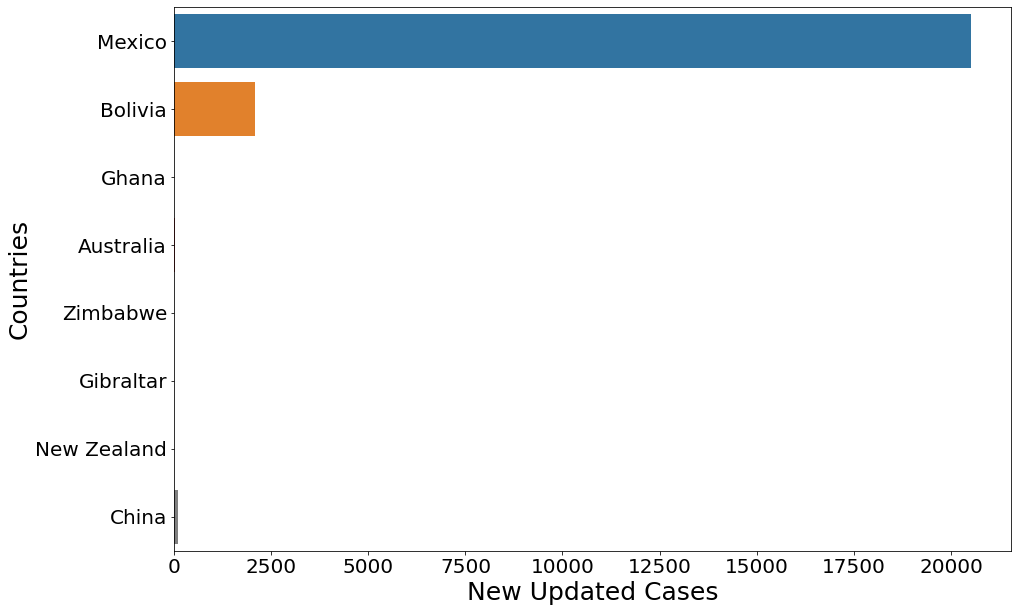

In [266]:
fig, ax = plt.subplots(figsize=(15,10))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("New Updated Case",fontsize=25)
plt.ylabel("Country",fontsize=25)
ax = sns.barplot(x = "NewCases",y="Country",data=new_updated_cases)
ax.set(xlabel="New Updated Cases",ylabel="Countries")
plt.savefig('contry_new_cases.png')

plt.show()

In [267]:
corona.head()

Country  TotalCases  NewCases  TotalDeaths  NewDeaths  TotalRecovered  \
8      USA  24306043.0       NaN     405261.0        NaN      14343644.0   
9    India  10558710.0       NaN     152311.0        NaN      10196885.0   
10  Brazil   8456705.0       NaN     209350.0        NaN       7388784.0   
11  Russia   3568209.0   23586.0      65566.0      481.0       2960431.0   
12      UK   3357361.0       NaN      88590.0        NaN       1519106.0   

    ActiveCases  Serious Critical  Tot Cases/1M pop  Deaths/1M pop  \
8     9557138.0           28850.0           73198.0         1220.0   
9      209514.0            8944.0            7611.0          110.0   
10     858571.0            8318.0           39632.0          981.0   
11     542212.0            2300.0           24445.0          449.0   
12    1749665.0            3789.0           49315.0         1301.0   

    Total Tests  Tests/1M pop    Population  
8   283753126.0      854521.0  3.320609e+08  
9   186544868.0      134458.0  1.387383e+09  
10   28600000.0      134032.0  2.133826e+08  
11   96600000.0      661786.0  1.459687e+08  
12   63139169.0      927419.0  6.808052e+07

In [268]:
## Lets see which country has the done the highest number of corona tests till now .

In [269]:
corona_tests_maximum = corona.groupby(by="Country")['Total Tests'].sum().sort_values(ascending = False).head(10)

In [270]:
corona_tests_maximum

Country
USA        283753126.0
India      186544868.0
China      160000000.0
Russia      96600000.0
UK          63139169.0
France      39548718.0
Germany     36353196.0
Italy       28994914.0
Spain       28775103.0
Brazil      28600000.0
Name: Total Tests, dtype: float64

* It seems that, USA has done the highest number of tests till now maybe it has the highest number of case and because of that the tests is also maximum. The second number of largest tests is done in India follwed by China and Russia.

In [271]:
corona_tests_minimum = corona.groupby(by="Country")['Total Tests'].sum().sort_values(ascending = True).head(10)

In [272]:
corona_tests_minimum

Country
MS Zaandam          0.0
Syria               0.0
Sudan               0.0
Diamond Princess    0.0
Burkina Faso        0.0
Nicaragua           0.0
Micronesia          0.0
Vatican City        0.0
Tanzania            0.0
Marshall Islands    0.0
Name: Total Tests, dtype: float64

In [273]:
corona.head()

Country  TotalCases  NewCases  TotalDeaths  NewDeaths  TotalRecovered  \
8      USA  24306043.0       NaN     405261.0        NaN      14343644.0   
9    India  10558710.0       NaN     152311.0        NaN      10196885.0   
10  Brazil   8456705.0       NaN     209350.0        NaN       7388784.0   
11  Russia   3568209.0   23586.0      65566.0      481.0       2960431.0   
12      UK   3357361.0       NaN      88590.0        NaN       1519106.0   

    ActiveCases  Serious Critical  Tot Cases/1M pop  Deaths/1M pop  \
8     9557138.0           28850.0           73198.0         1220.0   
9      209514.0            8944.0            7611.0          110.0   
10     858571.0            8318.0           39632.0          981.0   
11     542212.0            2300.0           24445.0          449.0   
12    1749665.0            3789.0           49315.0         1301.0   

    Total Tests  Tests/1M pop    Population  
8   283753126.0      854521.0  3.320609e+08  
9   186544868.0      134458.0  1.387383e+09  
10   28600000.0      134032.0  2.133826e+08  
11   96600000.0      661786.0  1.459687e+08  
12   63139169.0      927419.0  6.808052e+07

In [274]:
## Total Case out of 1 million population

In [275]:
totaltestpermillion= corona.groupby(by="Country")['Tot Cases/1M pop'].sum().sort_values(ascending = False).head(10)

In [276]:
totaltestpermillion

Country
Andorra             116871.0
Gibraltar           107971.0
Montenegro           87781.0
Czechia              82945.0
San Marino           81778.0
Luxembourg           77222.0
USA                  73198.0
Slovenia             71452.0
Panama               68084.0
French Polynesia     62581.0
Name: Tot Cases/1M pop, dtype: float64

* Here total tests per million totally depends upon the size of population. The less the population, the more will be the test done per 1 million population.

In [277]:
totaltestpermillioncases= corona[(corona['Country']=='Andorra') | (corona['Country']=='Gibraltar')|(corona['Country']=='Montenegro')|
                                    (corona['Country']=='Czechia')|(corona['Country']=='San Marino')|(corona['Country']=='Lumxemborg')|
                                     (corona['Country']=='USA')|(corona['Country']=='Slovenia')|(corona['Country']=='Panama')|
                                 (corona['Country']=='French Polynesia')
                                 
                                ]
                                     

In [278]:
totaltestpermillioncases

Country  TotalCases  NewCases  TotalDeaths  NewDeaths  \
8                 USA  24306043.0       NaN     405261.0        NaN   
28            Czechia    889159.0    5199.0      14338.0       67.0   
48             Panama    296269.0       NaN       4738.0        NaN   
74           Slovenia    148556.0       NaN       3140.0        NaN   
97         Montenegro     55136.0       NaN        743.0        NaN   
120  French Polynesia     17635.0       NaN        126.0        NaN   
141           Andorra      9038.0       NaN         91.0        NaN   
165         Gibraltar      3637.0       NaN         34.0        NaN   
170        San Marino      2778.0       NaN         65.0        NaN   

     TotalRecovered  ActiveCases  Serious Critical  Tot Cases/1M pop  \
8        14343644.0    9557138.0           28850.0           73198.0   
28         726409.0     148412.0            1122.0           82945.0   
48         236954.0      54577.0             233.0           68084.0   
74         121288.0      24128.0             193.0           71452.0   
97          44856.0       9537.0              68.0           87781.0   
120          4842.0      12667.0              16.0           62581.0   
141          8116.0        831.0              15.0          116871.0   
165          2588.0       1015.0             145.0          107971.0   
170          2455.0        258.0               9.0           81778.0   

     Deaths/1M pop  Total Tests  Tests/1M pop   Population  
8           1220.0  283753126.0      854521.0  332060944.0  
28          1338.0    5438980.0      507375.0   10719841.0  
48          1089.0    1519689.0      349229.0    4351553.0  
74          1510.0     745097.0      358376.0    2079094.0  
97          1183.0     207377.0      330161.0     628109.0  
120          447.0      26355.0       93526.0     281793.0  
141         1177.0     180088.0     2328734.0      77333.0  
165         1009.0     141311.0     4195072.0      33685.0  
170         1913.0      30287.0      891581.0      33970.0

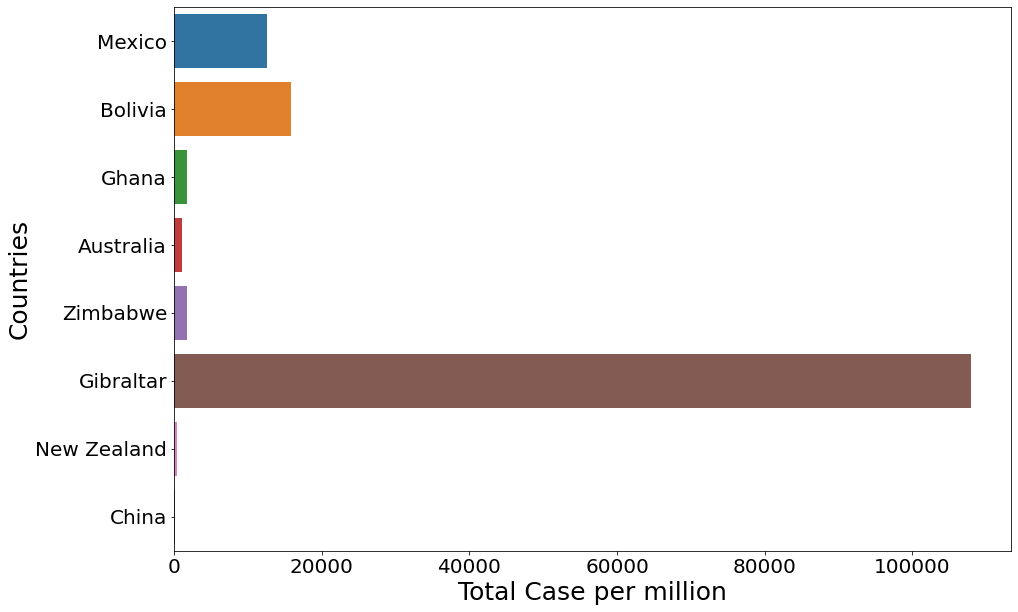

In [279]:
fig, ax = plt.subplots(figsize=(15,10))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("TotalCasepermillion",fontsize=25)
plt.ylabel("Country",fontsize=25)
ax = sns.barplot(x = "Tot Cases/1M pop",y="Country",data=new_updated_cases)
ax.set(xlabel="Total Case per million",ylabel="Countries")
plt.savefig('total_case_per_million.png')
plt.show()

In [280]:
corona.head()

Country  TotalCases  NewCases  TotalDeaths  NewDeaths  TotalRecovered  \
8      USA  24306043.0       NaN     405261.0        NaN      14343644.0   
9    India  10558710.0       NaN     152311.0        NaN      10196885.0   
10  Brazil   8456705.0       NaN     209350.0        NaN       7388784.0   
11  Russia   3568209.0   23586.0      65566.0      481.0       2960431.0   
12      UK   3357361.0       NaN      88590.0        NaN       1519106.0   

    ActiveCases  Serious Critical  Tot Cases/1M pop  Deaths/1M pop  \
8     9557138.0           28850.0           73198.0         1220.0   
9      209514.0            8944.0            7611.0          110.0   
10     858571.0            8318.0           39632.0          981.0   
11     542212.0            2300.0           24445.0          449.0   
12    1749665.0            3789.0           49315.0         1301.0   

    Total Tests  Tests/1M pop    Population  
8   283753126.0      854521.0  3.320609e+08  
9   186544868.0      134458.0  1.387383e+09  
10   28600000.0      134032.0  2.133826e+08  
11   96600000.0      661786.0  1.459687e+08  
12   63139169.0      927419.0  6.808052e+07

In [281]:
deathspermillionmaximum= corona.groupby(by="Country")['Deaths/1M pop'].sum().sort_values(ascending = False).head(10)

In [282]:
deathspermillionmaximum

Country
San Marino                1913.0
Belgium                   1756.0
Slovenia                  1510.0
Italy                     1354.0
Bosnia and Herzegovina    1349.0
Czechia                   1338.0
UK                        1301.0
North Macedonia           1294.0
Liechtenstein             1283.0
Bulgaria                  1225.0
Name: Deaths/1M pop, dtype: float64

* If we observe the deaths per million population, San Marino has the highest number of deaths with a count of 1913.Again here the size of population matters the most because the country with least size has the most effect when we see in per million population cases.

In [283]:
deathspermillionminimum= corona.groupby(by="Country")['Deaths/1M pop'].sum().sort_values(ascending = True).head(10)

In [284]:
deathspermillionminimum

Country
Solomon Islands          0.0
Samoa                    0.0
Marshall Islands         0.0
Falkland Islands         0.0
Cambodia                 0.0
Saint Kitts and Nevis    0.0
New Caledonia            0.0
Timor-Leste              0.0
Diamond Princess         0.0
Saint Pierre Miquelon    0.0
Name: Deaths/1M pop, dtype: float64

In [285]:
## Now lets observe the single case of Nepal

In [286]:
nepal = corona[corona['Country']=='Nepal']

In [287]:
nepal.head()

Country  TotalCases  NewCases  TotalDeaths  NewDeaths  TotalRecovered  \
49   Nepal    267056.0       NaN       1954.0        NaN        261044.0   

    ActiveCases  Serious Critical  Tot Cases/1M pop  Deaths/1M pop  \
49       4058.0               NaN            9077.0           66.0   

    Total Tests  Tests/1M pop  Population  
49    2008944.0       68285.0  29420177.0

* From this nepal dataframe it is clear that the total number of cases of Nepal is 267056, with the total deaths count of 1954. Similary, the total number of recovered cases is 261044 and active cases is 4058. Till now in Nepal 2008944 tests has been done which is also commonly knowns as PCR test.


In [288]:
# Now lets see the distribution of the total data

In [289]:
total_case_sum = corona['TotalCases'].sum()
total_case_sum

95007500.0

In [290]:
total_deaths_sum =  corona['TotalDeaths'].sum()
total_deaths_sum

2032111.0

In [291]:
total_recovered_sum = corona['TotalRecovered'].sum()
total_recovered_sum

67615951.0

In [292]:
total_activecases_sum =  corona['ActiveCases'].sum()
total_activecases_sum

21753434.0

In [293]:
total_critical_cases = corona['Serious Critical'].sum()
total_critical_cases

111747.0

In [294]:
total_population = corona['Population'].sum()
total_population

7800563070.0

In [295]:
# Lets make the DataFrame of total datas

In [296]:
df_total = pd.DataFrame(data={"Total_Cases_Sum":total_case_sum,
                              "Total_Recovered_Sum":total_recovered_sum,
                              "Total_Deaths_Sum":total_deaths_sum,
                              "Total_ActiveCase_Sum":total_activecases_sum,
                              "Total_Critical_Sum":total_critical_cases,
                              
                             },index=[0])

In [297]:
df_total

Total_Cases_Sum  Total_Recovered_Sum  Total_Deaths_Sum  \
0       95007500.0           67615951.0         2032111.0   

   Total_ActiveCase_Sum  Total_Critical_Sum  
0            21753434.0            111747.0

In [298]:
#So let's visualize this in bar diagram

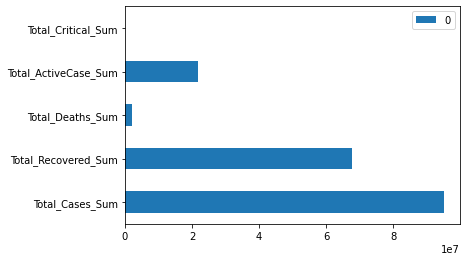

In [299]:
df_total.T.plot(kind="barh");

## Thanks DeepMindCreations for giving me this opportunity :)